<a href="https://colab.research.google.com/github/ancestor9/Affalatoxin-Analysis/blob/main/DL_prediction/20251017_TFT_50.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

path = '/content/drive/MyDrive/FDA/data/data_DOWNSIZE.pkl'
df = pd.read_pickle(path, compression='gzip')

Mounted at /content/drive


In [3]:
df.shape

(326021, 548)

In [4]:
df.columns

Index(['afp_00', 'afp_01', 'afp_02', 'afp_03', 'afp_04', 'afp_05', 'afp_06',
       'afp_07', 'afp_08', 'afp_09',
       ...
       'tmprt_150_58', 'tmprt_150_59', 'INSPCT_PURPS_NAME', 'PRDLST_NM',
       '사용주소', '1차 식품 분류 (세부)', 'JDGMNT_WORD_NAME', '결과', '결과값',
       'JDGMNT_WORD_NAME_encoded'],
      dtype='object', length=548)

In [5]:
non_timeseries_cols = ['INSPCT_PURPS_NAME', 'PRDLST_NM',
       '사용주소', '1차 식품 분류 (세부)', 'JDGMNT_WORD_NAME', '결과', '결과값',
       'JDGMNT_WORD_NAME_encoded'
    ]

In [6]:
# Identify timeseries patterns
all_cols = df.columns.tolist()
timeseries_patterns = []
for col in all_cols:
    # Check if the column is not in non_timeseries_cols and matches a pattern like 'abc_XX'
    if col not in non_timeseries_cols and '_' in col and col.split('_')[-1].isdigit():
        pattern = '_'.join(col.split('_')[:-1])
        if pattern not in timeseries_patterns:
            timeseries_patterns.append(pattern)

print("Identified timeseries patterns:", timeseries_patterns)

Identified timeseries patterns: ['afp', 'arvlty_300Top', 'arvlty_300', 'hd_150', 'soil_Mitr_10', 'solrad_Qy', 'tmprt_150Lwet', 'tmprt_150Top', 'tmprt_150']


In [7]:
timeseries_patterns

['afp',
 'arvlty_300Top',
 'arvlty_300',
 'hd_150',
 'soil_Mitr_10',
 'solrad_Qy',
 'tmprt_150Lwet',
 'tmprt_150Top',
 'tmprt_150']

## 시계열 timesteps를 50일로 변환

In [8]:
import pandas as pd
import numpy as np

def convert_60days_to_50days(df):
    new_data = {}

    # 1. 비시계열 컬럼은 그대로 복사
    for col in non_timeseries_cols:
        if col in df.columns:
            new_data[col] = df[col].values

    # 2. 시계열 컬럼 변환 (60일 -> 50일)
    for pattern in timeseries_patterns:
        # 해당 패턴의 모든 컬럼 찾기 (00~59)
        pattern_cols = [col for col in df.columns if col.startswith(f'{pattern}_')]

        if len(pattern_cols) > 0:
            # 60개의 시계열 데이터를 추출
            timeseries_data = df[pattern_cols].values  # shape: (n_samples, 60)

            # 60일을 50일로 리샘플링 (균등하게 10개 제거)
            # 방법: 60개 중 10개를 균등하게 건너뛰기
            indices_to_keep = np.round(np.linspace(0, 59, 50)).astype(int)
            resampled_data = timeseries_data[:, indices_to_keep]

            # 새로운 컬럼명으로 저장 (00~49)
            for i in range(50):
                new_col_name = f'{pattern}_{i:02d}'
                new_data[new_col_name] = resampled_data[:, i]

    # 새로운 데이터프레임 생성
    df_new = pd.DataFrame(new_data)

    # 컬럼 순서 정렬: 시계열 컬럼들을 먼저, 그 다음 비시계열 컬럼들
    timeseries_cols = [col for col in df_new.columns if any(col.startswith(f'{p}_') for p in timeseries_patterns)]
    timeseries_cols_sorted = sorted(timeseries_cols)
    other_cols = [col for col in df_new.columns if col not in timeseries_cols]

    df_new = df_new[timeseries_cols_sorted + other_cols]

    return df_new


# 사용 예시
df_50days = convert_60days_to_50days(df)
df = df_50days.copy()
print(f"변환 후 shape: {df_50days.shape}, 시계열컬럼수: {(df_50days.shape[1] - 8)/len(timeseries_patterns)}")
print(f"변환 후 columns: {df_50days.columns.tolist()}")

변환 후 shape: (326021, 458), 시계열컬럼수: 50.0
변환 후 columns: ['afp_00', 'afp_01', 'afp_02', 'afp_03', 'afp_04', 'afp_05', 'afp_06', 'afp_07', 'afp_08', 'afp_09', 'afp_10', 'afp_11', 'afp_12', 'afp_13', 'afp_14', 'afp_15', 'afp_16', 'afp_17', 'afp_18', 'afp_19', 'afp_20', 'afp_21', 'afp_22', 'afp_23', 'afp_24', 'afp_25', 'afp_26', 'afp_27', 'afp_28', 'afp_29', 'afp_30', 'afp_31', 'afp_32', 'afp_33', 'afp_34', 'afp_35', 'afp_36', 'afp_37', 'afp_38', 'afp_39', 'afp_40', 'afp_41', 'afp_42', 'afp_43', 'afp_44', 'afp_45', 'afp_46', 'afp_47', 'afp_48', 'afp_49', 'arvlty_300Top_00', 'arvlty_300Top_01', 'arvlty_300Top_02', 'arvlty_300Top_03', 'arvlty_300Top_04', 'arvlty_300Top_05', 'arvlty_300Top_06', 'arvlty_300Top_07', 'arvlty_300Top_08', 'arvlty_300Top_09', 'arvlty_300Top_10', 'arvlty_300Top_11', 'arvlty_300Top_12', 'arvlty_300Top_13', 'arvlty_300Top_14', 'arvlty_300Top_15', 'arvlty_300Top_16', 'arvlty_300Top_17', 'arvlty_300Top_18', 'arvlty_300Top_19', 'arvlty_300Top_20', 'arvlty_300Top_21', 'arvl

In [9]:
# Target mean

df = df.drop(columns=['사용주소', 'PRDLST_NM', 'JDGMNT_WORD_NAME'])
## traget mean ###
df['교차_조합'] = df['1차 식품 분류 (세부)'] + '_' + df['INSPCT_PURPS_NAME']
cross_mean = df.groupby('교차_조합')['JDGMNT_WORD_NAME_encoded'].mean()
df['Target_Mean'] = df['교차_조합'].map(cross_mean)
# print("\n--- 실제 계산된 교차 조합별 Target Mean 값 ---")
# print(cross_mean)
df.drop(columns=['교차_조합'], inplace=True)

In [ ]:
df.columns

Index(['afp_00', 'afp_01', 'afp_02', 'afp_03', 'afp_04', 'afp_05', 'afp_06',
       'afp_07', 'afp_08', 'afp_09',
       ...
       'tmprt_150_46', 'tmprt_150_47', 'tmprt_150_48', 'tmprt_150_49',
       'INSPCT_PURPS_NAME', '1차 식품 분류 (세부)', '결과', '결과값',
       'JDGMNT_WORD_NAME_encoded', 'Target_Mean'],
      dtype='object', length=456)

In [21]:
X_ts = df.iloc[:, : -6]
print(X_ts.shape)
X_lm = df[['INSPCT_PURPS_NAME', '1차 식품 분류 (세부)', 'Target_Mean']]
print(X_lm.shape)

(326021, 450)
(326021, 3)


In [24]:
from sklearn.preprocessing import OneHotEncoder

#=========================================================
# 2. 범주형 변수 One-Hot Encoding
# =========================================================
cat_cols = ['INSPCT_PURPS_NAME', '1차 식품 분류 (세부)']
num_cols = ['Target_Mean']

encoder = OneHotEncoder(sparse_output=False)
X_cat = encoder.fit_transform(X_lm[cat_cols])

# One-Hot 결과를 데이터프레임 형태로 합침
cat_feature_names = encoder.get_feature_names_out(cat_cols)
X_cat_df = pd.DataFrame(X_cat, columns=cat_feature_names)

# 최종 X_tab 구성 (수치형 + One-Hot)
X_tab = pd.concat([X_lm[num_cols].reset_index(drop=True),
                           X_cat_df.reset_index(drop=True)], axis=1)
X_tab = X_tab.astype(np.float32)
print("X_tab_encoded shape:", X_tab.shape)


X_tab_encoded shape: (326021, 34)


In [27]:
X_ts.shape

(326021, 450)

## 1. 실험 데이터 1

In [29]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    classification_report, confusion_matrix, roc_auc_score,
    precision_score, recall_score, f1_score
)
from imblearn.over_sampling import SMOTE
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers, callbacks
import matplotlib.pyplot as plt
import seaborn as sns

# ==========================================================
# ⚙️ Attention Layer (Multi-Head)
# ==========================================================
class MultiHeadAttentionLayer(layers.Layer):
    def __init__(self, num_heads=4, key_dim=32):
        super().__init__()
        self.att = layers.MultiHeadAttention(num_heads=num_heads, key_dim=key_dim)
        self.norm = layers.LayerNormalization()

    def call(self, inputs):
        attn_output = self.att(inputs, inputs)
        out = self.norm(inputs + attn_output)
        return out

# ==========================================================
# ⚙️ Focal Loss
# ==========================================================
def focal_loss(alpha=0.75, gamma=2.0):
    def focal_loss_fixed(y_true, y_pred):
        y_true = tf.cast(y_true, tf.float32)
        eps = 1e-8
        y_pred = tf.clip_by_value(y_pred, eps, 1. - eps)
        loss_pos = -alpha * tf.pow(1 - y_pred, gamma) * tf.math.log(y_pred)
        loss_neg = -(1 - alpha) * tf.pow(y_pred, gamma) * tf.math.log(1 - y_pred)
        loss = tf.where(tf.equal(y_true, 1), loss_pos, loss_neg)
        return tf.reduce_mean(loss)
    return focal_loss_fixed

# ==========================================================
# ⚙️ F1 Score Metric
# ==========================================================
class F1Score(tf.keras.metrics.Metric):
    def __init__(self, name='f1_score', threshold=0.5, **kwargs):
        super().__init__(name=name, **kwargs)
        self.precision = tf.keras.metrics.Precision(thresholds=threshold)
        self.recall = tf.keras.metrics.Recall(thresholds=threshold)

    def update_state(self, y_true, y_pred, sample_weight=None):
        self.precision.update_state(y_true, y_pred, sample_weight)
        self.recall.update_state(y_true, y_pred, sample_weight)

    def result(self):
        p = self.precision.result()
        r = self.recall.result()
        return 2 * ((p * r) / (p + r + tf.keras.backend.epsilon()))

    def reset_state(self):
        self.precision.reset_state()
        self.recall.reset_state()

# ==========================================================
# ⚙️ Data Preprocessing (사용자 코드 유지)
# ==========================================================
def preprocess(X_ts, X_lm, y, n_features=9, timesteps=50, random_state=42):
    if isinstance(X_ts, pd.DataFrame):
        X_ts = X_ts.values

    X_ts = X_ts.reshape(-1, timesteps, n_features)

    scaler = StandardScaler()
    X_ts_2d = X_ts.reshape(-1, n_features)
    X_ts_scaled = scaler.fit_transform(X_ts_2d).reshape(-1, timesteps, n_features)

    cat_cols = ['INSPCT_PURPS_NAME', '1차 식품 분류 (세부)']
    num_cols = ['Target_Mean']

    encoder = OneHotEncoder(sparse_output=False)
    X_cat = encoder.fit_transform(X_lm[cat_cols])
    X_num = X_lm[num_cols].values
    X_lm_proc = np.hstack([X_cat, X_num])

    X_ts_train, X_ts_test, X_lm_train, X_lm_test, y_train, y_test = train_test_split(
        X_ts_scaled, X_lm_proc, y, test_size=0.2, stratify=y, random_state=random_state
    )

    X_ts_train_flat = X_ts_train.reshape(X_ts_train.shape[0], -1)
    X_train_combined = np.concatenate([X_ts_train_flat, X_lm_train], axis=1)

    sm = SMOTE(random_state=random_state)
    X_resampled, y_train_res = sm.fit_resample(X_train_combined, y_train)

    ts_flat_shape = X_ts_train_flat.shape[1]
    X_ts_train_res_flat = X_resampled[:, :ts_flat_shape]
    X_lm_train_res = X_resampled[:, ts_flat_shape:]
    X_ts_train_res = X_ts_train_res_flat.reshape(-1, timesteps, n_features)

    return X_ts_train_res, X_lm_train_res, y_train_res, X_ts_test, X_lm_test, y_test

# ==========================================================
# ⚙️ Hybrid Model (Conv1D + BiLSTM + Multi-Head Attention)
# ==========================================================
def build_hybrid_model(n_timestamps, n_features_ts, n_tab_features,
                       lstm_units=64, fnn_units=[64, 32],
                       dropout=0.4, learning_rate=1e-3):

    # ===== 시계열 Branch =====
    ts_input = layers.Input(shape=(n_timestamps, n_features_ts), name='ts_input')

    x = layers.Conv1D(64, kernel_size=3, activation='relu', padding='same')(ts_input)
    x = layers.BatchNormalization()(x)
    x = layers.Bidirectional(layers.LSTM(lstm_units, return_sequences=True))(x)
    x = MultiHeadAttentionLayer(num_heads=4, key_dim=32)(x)
    x = layers.GlobalAveragePooling1D()(x)
    x = layers.Dropout(dropout)(x)

    # ===== Tabular Branch =====
    tab_input = layers.Input(shape=(n_tab_features,), name='tab_input')
    t = layers.Dense(fnn_units[0], activation='relu')(tab_input)
    t = layers.BatchNormalization()(t)
    t = layers.Dense(fnn_units[1], activation='relu')(t)
    t = layers.Add()([t, tab_input[:, :fnn_units[1]]]) if n_tab_features >= fnn_units[1] else t
    t = layers.Dropout(dropout)(t)

    # ===== Fusion =====
    merged = layers.Concatenate()([x, t])
    m = layers.Dense(64, activation='relu')(merged)
    m = layers.BatchNormalization()(m)
    m = layers.Dropout(dropout)(m)
    output = layers.Dense(1, activation='sigmoid')(m)

    model = models.Model(inputs=[ts_input, tab_input], outputs=output)

    model.compile(
        optimizer=optimizers.Adam(learning_rate),
        loss=focal_loss(alpha=0.8, gamma=2.5),
        metrics=['accuracy', tf.keras.metrics.AUC(name='auc'),
                 tf.keras.metrics.Recall(name='recall'),
                 tf.keras.metrics.Precision(name='precision'),
                 F1Score(name='f1_score')]
    )
    return model

# ==========================================================
# ⚙️ Train & Evaluate
# ==========================================================
def train_and_evaluate(X_ts_train, X_tab_train, y_train, X_ts_val, X_tab_val, y_val,
                       epochs=40, batch_size=512):
    model = build_hybrid_model(
        n_timestamps=X_ts_train.shape[1],
        n_features_ts=X_ts_train.shape[2],
        n_tab_features=X_tab_train.shape[1]
    )

    es = callbacks.EarlyStopping(monitor='val_f1_score', patience=10, mode='max', restore_best_weights=True)
    rl = callbacks.ReduceLROnPlateau(monitor='val_f1_score', factor=0.5, patience=5,
                                     mode='max', min_lr=1e-6, verbose=1)
    mc = callbacks.ModelCheckpoint("best_model.keras", monitor='val_f1_score', mode='max',
                                   save_best_only=True, verbose=1)

    history = model.fit(
        {'ts_input': X_ts_train, 'tab_input': X_tab_train}, y_train,
        validation_data=({'ts_input': X_ts_val, 'tab_input': X_tab_val}, y_val),
        epochs=epochs, batch_size=batch_size, callbacks=[es, rl, mc], verbose=1
    )

    y_prob = model.predict({'ts_input': X_ts_val, 'tab_input': X_tab_val}).ravel()
    y_pred = (y_prob >= 0.5).astype(int)

    print("\n[Classification Report]")
    print(classification_report(y_val, y_pred, digits=4))
    print("ROC-AUC:", roc_auc_score(y_val, y_prob))

    return model, history

# ==========================================================
# ⚙️ 실행
# ==========================================================
if __name__ == "__main__":

    X_ts_train, X_tab_train, y_train, X_ts_val, X_tab_val, y_val = preprocess(
        X_ts, X_lm, y, n_features=9, timesteps=50, random_state=42
    )

    print(f"\nAfter SMOTE: Train {y_train.shape}, Val {y_val.shape}")

    model, history = train_and_evaluate(
        X_ts_train, X_tab_train, y_train,
        X_ts_val, X_tab_val, y_val,
        epochs=40, batch_size=512
    )




After SMOTE: Train (515308,), Val (65205,)
Epoch 1/40
1007/1007 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.6635 - auc: 0.7526 - f1_score: 0.7181 - loss: 0.0630 - precision: 0.6166 - recall: 0.8615
Epoch 1: val_f1_score improved from -inf to 0.04410, saving model to best_model.keras
1007/1007 ━━━━━━━━━━━━━━━━━━━━ 33s 22ms/step - accuracy: 0.6635 - auc: 0.7527 - f1_score: 0.7182 - loss: 0.0630 - precision: 0.6166 - recall: 0.8615 - val_accuracy: 0.6184 - val_auc: 0.7278 - val_f1_score: 0.0441 - val_loss: 0.0276 - val_precision: 0.0227 - val_recall: 0.7257 - learning_rate: 0.0010
Epoch 2/40
1006/1007 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.8304 - auc: 0.9533 - f1_score: 0.8501 - loss: 0.0199 - precision: 0.7616 - recall: 0.9621
Epoch 2: val_f1_score improved from 0.04410 to 0.05506, saving model to best_model.keras
1007/1007 ━━━━━━━━━━━━━━━━━━━━ 20s 20ms/step - accuracy: 0.8305 - auc: 0.9533 - f1_score: 0.8501 - loss: 0.0199 - precision: 0.7617 - recall: 0.9621 - val_accurac

2038/2038 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step

[Classification Report]
              precision    recall  f1-score   support

           0     0.9917    0.9085    0.9482     64414
           1     0.0484    0.3793    0.0859       791

    accuracy                         0.9020     65205
   macro avg     0.5200    0.6439    0.5171     65205
weighted avg     0.9802    0.9020    0.9378     65205

ROC-AUC: 0.7838958594210641


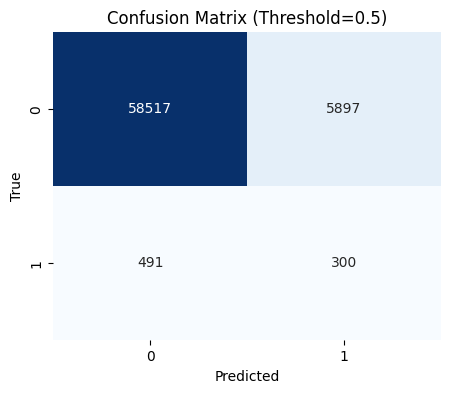

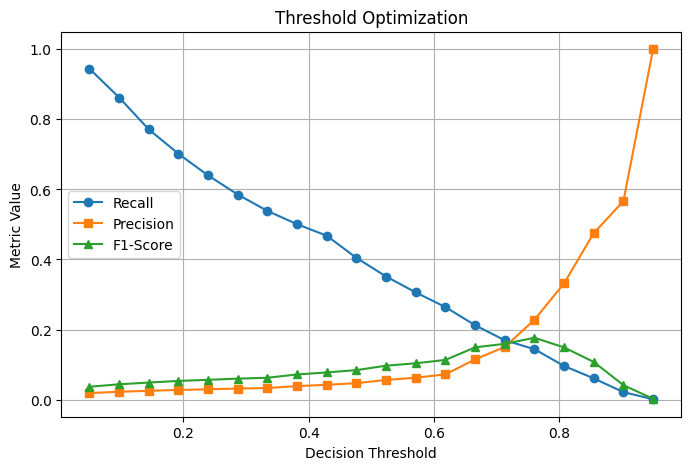

In [31]:
#----- 평가 -----
y_prob = model.predict({'ts_input': X_ts_val, 'tab_input': X_tab_val}).ravel()
y_pred = (y_prob >= 0.5).astype(int)

print("\n[Classification Report]")
print(classification_report(y_val, y_pred, digits=4))
print("ROC-AUC:", roc_auc_score(y_val, y_prob))

cm = confusion_matrix(y_val, y_pred)
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title("Confusion Matrix (Threshold=0.5)")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# ----- Threshold별 성능 시각화 -----
thresholds = np.linspace(0.05, 0.95, 20)
recalls, precisions, f1s = [], [], []
for th in thresholds:
    pred = (y_prob >= th).astype(int)
    recalls.append(recall_score(y_val, pred, zero_division=0))
    precisions.append(precision_score(y_val, pred, zero_division=0))
    f1s.append(f1_score(y_val, pred, zero_division=0))

plt.figure(figsize=(8, 5))
plt.plot(thresholds, recalls, label='Recall', marker='o')
plt.plot(thresholds, precisions, label='Precision', marker='s')
plt.plot(thresholds, f1s, label='F1-Score', marker='^')
plt.xlabel('Decision Threshold')
plt.ylabel('Metric Value')
plt.title('Threshold Optimization')
plt.legend()
plt.grid(True)
plt.show()

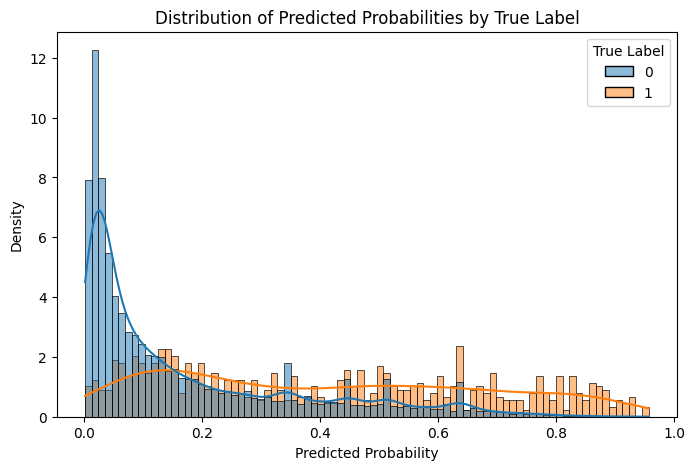

In [33]:
#Assuming y_val and y_prob are available from previous execution

# Create a DataFrame for plotting
plot_df = pd.DataFrame({
    'Predicted Probability': y_prob,
    'True Label': y_val
})

# Plot distributions
plt.figure(figsize=(8, 5))
sns.histplot(data=plot_df, x='Predicted Probability', hue='True Label', kde=True, stat='density', common_norm=False)
plt.title('Distribution of Predicted Probabilities by True Label')
plt.xlabel('Predicted Probability')
plt.ylabel('Density')
plt.show()

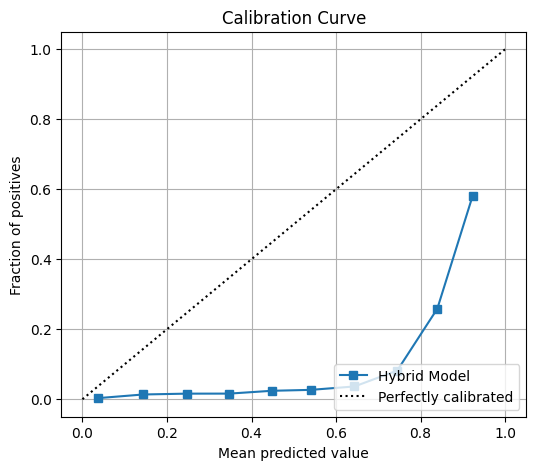

In [34]:
from sklearn.calibration import calibration_curve
import matplotlib.pyplot as plt

# Calculate calibration curve
# Assuming y_val and y_prob are available from previous execution
fraction_of_positives, mean_predicted_value = calibration_curve(y_val, y_prob, n_bins=10)

plt.figure(figsize=(6, 5))
plt.plot(mean_predicted_value, fraction_of_positives, "s-", label="Hybrid Model")
plt.plot([0, 1], [0, 1], "k:", label="Perfectly calibrated")
plt.xlabel("Mean predicted value")
plt.ylabel("Fraction of positives")
plt.title("Calibration Curve")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

2038/2038 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step


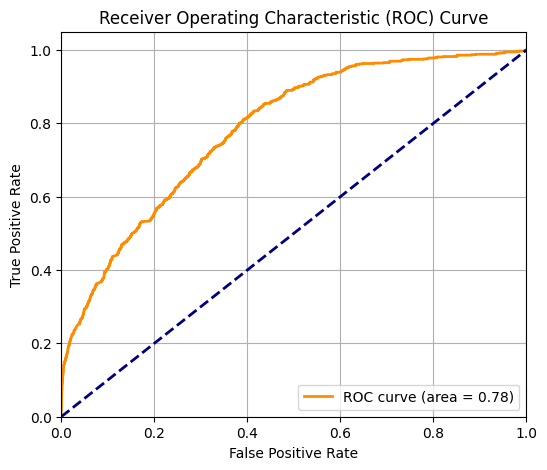

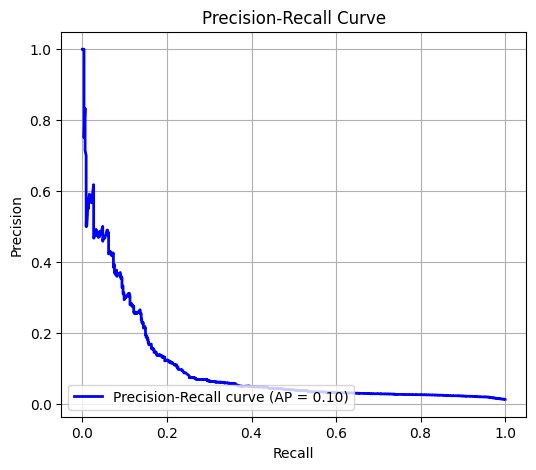

In [35]:
from sklearn.metrics import roc_curve, auc, precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt

# 모델 예측 (y_prob 계산)
# train_and_evaluate 함수에서 반환된 model 객체를 사용해야 합니다.
# 현재 코드에서는 model 객체를 직접 사용할 수 없으므로,
# 이전 셀의 train_and_evaluate 함수 내부에서 예측을 수행하거나,
# model 객체를 전역 변수로 선언하거나 반환하도록 수정해야 합니다.
# 여기서는 임시로 이전 셀에서 사용된 model 객체를 가져온다고 가정하고 코드를 작성합니다.

# 모델 예측 (이전 셀에서 model 객체가 정의되었다고 가정)
# 만약 model 객체가 정의되지 않았다면, 이전 셀을 다시 실행하거나
# model 객체를 반환하도록 train_and_evaluate 함수를 수정해야 합니다.
try:
    y_prob = model.predict({'ts_input': X_ts_val, 'tab_input': X_tab_val}).ravel()

    # AUROC Curve
    fpr, tpr, _ = roc_curve(y_val, y_prob)
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(6, 5))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.grid(True)
    plt.show()

    # PR Curve
    precision, recall, _ = precision_recall_curve(y_val, y_prob)
    average_precision = average_precision_score(y_val, y_prob)


    plt.figure(figsize=(6, 5))
    plt.plot(recall, precision, color='blue', lw=2, label='Precision-Recall curve (AP = %0.2f)' % average_precision)
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve')
    plt.legend(loc="lower left")
    plt.grid(True)
    plt.show()

except NameError:
    print("오류: 'model' 또는 'X_ts_val', 'X_tab_val', 'y_val' 변수가 정의되지 않았습니다. 이전 셀을 실행하여 변수를 정의해주세요.")